# Pollution Management

### The dataset you provided has the shape (1092, 9), which means it contains 1092 samples (rows) and 9 features (columns).
### T: Temperature
### TM: Maximum Temperature
### Tm: Minimum Temperature
### SLP: Sea Level Pressure
### H: Humidity
### VV: Visibility
### V: Wind Speed
### VM: Maximum Wind Speed
### PM 2.5: Particulate Matter (PM) with a diameter of 2.5 micrometers or less

### IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 df = pd.read_csv("C:\\Users\\ayush\\Downloads\\archive (48)\\Real_Combine.csv")

In [8]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [9]:
df.dropna()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [10]:
df.shape

(1093, 9)

In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.631462
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.568409
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.673824
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.623187
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.138005
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.573941
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.268530
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


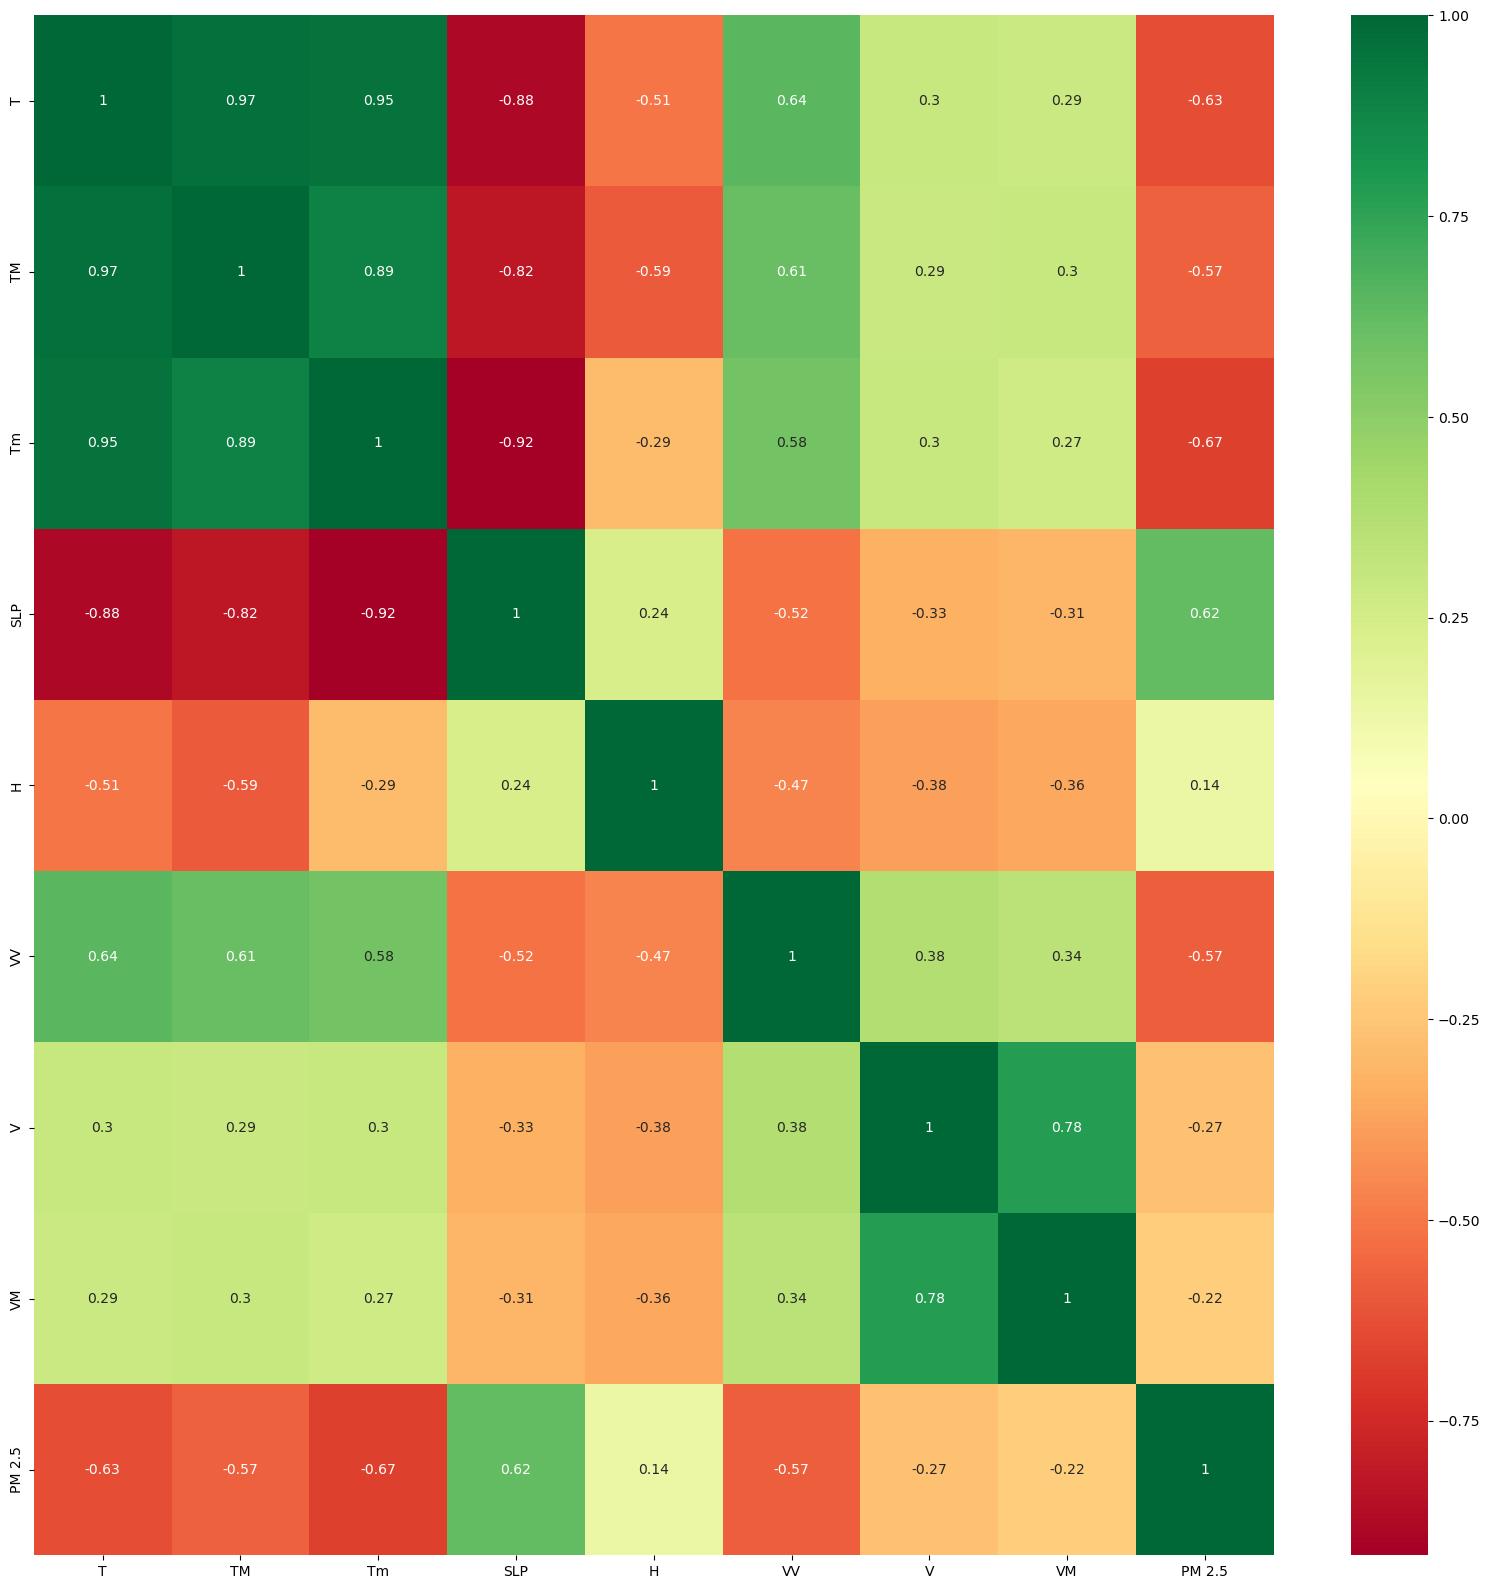

In [108]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

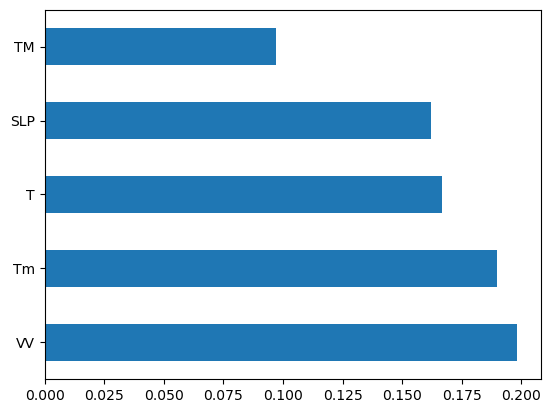

In [110]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [13]:
X=df.iloc[:,:-1] #independent features
Y=df.iloc[:,-1] #dependent features

In [16]:
X = X[~Y.isna()]  # Keep only rows in X where Y is not NaN
Y = Y.dropna()

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


### LINEAR REGRESSION

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Creating a scaler object for normalization
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a linear regression model
regressor = LinearRegression()

# Training the model on the normalized training data
regressor.fit(X_train_scaled, Y_train)

# Coefficients of the linear regression model
coefficients = regressor.coef_

# Printing the coefficients
print("Coefficients:", coefficients)

# Calculating the R-squared value for the training data
train_r_squared = regressor.score(X_train_scaled, Y_train)
print("Coefficient of determination R^2 on the train set:", train_r_squared)

# Calculating the R-squared value for the test data
test_r_squared = regressor.score(X_test_scaled, Y_test)
print("Coefficient of determination R^2 on the test set:", test_r_squared)


Coefficients: [-19.54571328   3.10452055 -28.81100207  -0.33501925 -19.16931195
 -29.50763839  -9.36927292   3.95347   ]
Coefficient of determination R^2 on the train set: 0.551516808175875
Coefficient of determination R^2 on the test set: 0.485253313085679


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a regression model
regressor = LinearRegression()

# Perform cross-validation with 5 folds and calculate R-squared as the scoring metric
cv_scores = cross_val_score(regressor, X, Y, cv=5, scoring='r2')

# Print the cross-validated scores
print("Cross-validated scores:", cv_scores)
#sns.distplot Y_test - prediction
# Calculate the average cross-validated score
avg_cv_score = cv_scores.mean()
print("Average cross-validated score:", avg_cv_score)

Cross-validated scores: [0.51616617 0.43816894 0.50733957 0.4861091  0.40750087]
Average cross-validated score: 0.4710569304807393


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a regression model
regressor = LinearRegression()

# Perform cross-validation with 5 folds and calculate R-squared as the scoring metric
cv_scores = cross_val_score(regressor, X, Y, cv=5, scoring='r2')

# Print the cross-validated scores
print("Cross-validated scores:", cv_scores)

# Calculate the average cross-validated score
avg_cv_score = cv_scores.mean()
print("Average cross-validated score:", avg_cv_score)

# Now, fit the regressor on the entire dataset (or the training set)
regressor.fit(X_train_scaled, Y_train)

# Make predictions on the testing set
test_predictions = regressor.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) for the testing set
test_rmse = mean_squared_error(Y_test, test_predictions, squared=False)
print("Root Mean Squared Error (RMSE) for testing set:", test_rmse)

# Calculate Mean Absolute Error (MAE) for the testing set
test_mae = mean_absolute_error(Y_test, test_predictions)
print("Mean Absolute Error (MAE) for testing set:", test_mae)


Cross-validated scores: [0.51616617 0.43816894 0.50733957 0.4861091  0.40750087]
Average cross-validated score: 0.4710569304807393
Root Mean Squared Error (RMSE) for testing set: 60.72514331751238
Mean Absolute Error (MAE) for testing set: 44.836241266286365


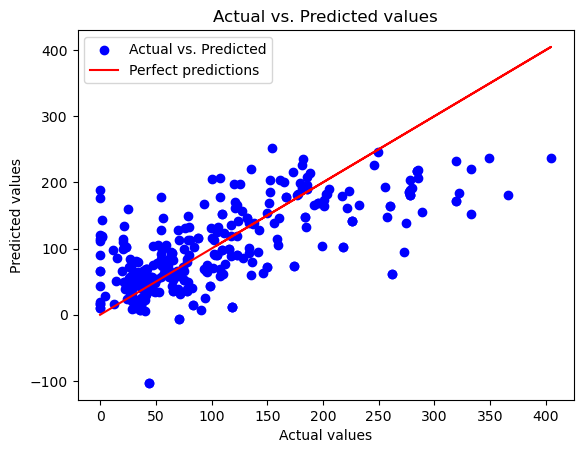

In [20]:
import matplotlib.pyplot as plt

# Plotting the actual values from the test set
plt.scatter(Y_test, test_predictions, color='blue', label='Actual vs. Predicted')

# Adding a diagonal line for reference (perfect predictions)
plt.plot(Y_test, Y_test, color='red', label='Perfect predictions')

# Adding labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')

# Adding legend
plt.legend()

# Display the plot
plt.show()


## RANDOM FOREST REGRESSOR

## Train Test split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [25]:
rf_regressor = RandomForestRegressor()

In [26]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
test_predictions_rf = rf_regressor.predict(X_test)

In [28]:
rf_r_squared = r2_score(Y_test, test_predictions_rf)
rf_mae = mean_absolute_error(Y_test, test_predictions_rf)
rf_mse = mean_squared_error(Y_test, test_predictions_rf)
rf_rmse = mean_squared_error(Y_test, test_predictions_rf, squared=False)

# Print the results
print("Random Forest Regressor Evaluation Metrics:")
print("R-squared:", rf_r_squared)
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)

Random Forest Regressor Evaluation Metrics:
R-squared: 0.7871822211981181
Mean Absolute Error (MAE): 24.100354674796748
Mean Squared Error (MSE): 1524.584299480924
Root Mean Squared Error (RMSE): 39.04592551702321


In [29]:
# Print the predictions made by the Random Forest Regressor model
print("Predictions made by Random Forest Regressor model:")
print(test_predictions_rf)

Predictions made by Random Forest Regressor model:
[ 95.26541667 137.93783333 280.97458333 104.09625     44.42666667
 146.11283333 234.43966667 205.053       39.79583333 206.63704167
  86.0775     158.18125     30.81208333  80.51375    102.50708333
 158.18125    223.80754167 214.61233333  75.67458333 149.83954167
  12.26583333  38.56708333  42.81125    108.0025     144.72975
  77.97333333  42.22166667 127.02625     12.45375     77.96166667
  85.2875     134.319125   139.37275     22.34375     47.21333333
 104.175      273.10879167  89.72708333  41.28875    124.82195833
  57.76291667  57.8        173.87041667 131.03416667 113.86154167
 102.50708333  47.53666667  86.0775     120.86541667  90.96583333
 245.12025     80.89875    311.76070833  85.09041667  46.78625
  46.78625     64.65625    101.5075      42.2425      44.11125
  52.025      117.01541667  35.25875    209.77225     90.96583333
 201.68904167 219.30295833 173.87041667  44.23583333  56.06875
 188.18275     82.67083333  74.316166

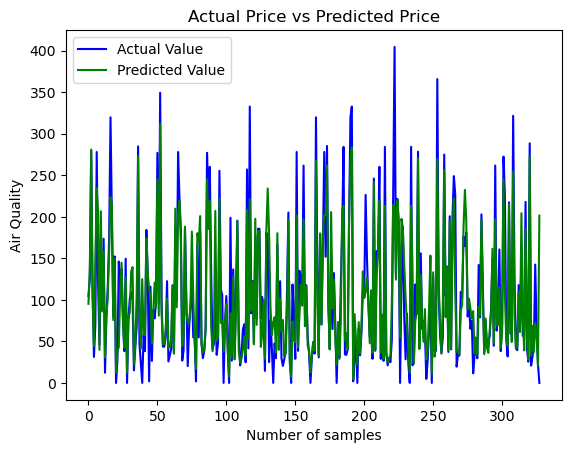

In [30]:
import matplotlib.pyplot as plt

# Plotting the actual values from the test set
plt.plot(Y_test.values, color='blue', label='Actual Value')

# Plotting the predicted values from the Random Forest Regressor model
plt.plot(test_predictions_rf, color='green', label='Predicted Value')

# Adding title and labels
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of samples')
plt.ylabel('Air Quality')

# Adding legend
plt.legend()

# Display the plot
plt.show()


## Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# Your code here


# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']   # Number of features to consider when looking for the best split
}

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Instantiate the GridSearchCV object with the Random Forest Regressor model and parameter grid
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Perform hyperparameter tuning by fitting the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator (model) found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
test_predictions_best = best_rf_model.predict(X_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [32]:
# Make predictions on the testing set using the best model
test_predictions_best = best_rf_model.predict(X_test)

# Print the predictions
print("Predictions made by the best Random Forest Regressor model:")
print(test_predictions_best)


Predictions made by the best Random Forest Regressor model:
[ 95.24645833 138.07522917 272.84147917 104.60958333  42.10873309
 150.95383333 229.40658333 193.75495833  40.20479167 202.6813125
  87.716875   155.903125    31.85294865  77.91958333 100.59916667
 155.903125   236.75375    213.93083333  75.95046991 149.18835417
  13.11670162  37.3321875   43.33993345 106.40416667 149.45635417
  74.15229167  47.0142127  126.089375    14.22888426  76.20958333
  85.770625   131.15258333 136.42727083  22.311875    45.50479225
 104.715625   275.13864583  88.21291667  48.33458333 128.34814583
  57.22931944  57.9767381  179.248125   130.77729167 137.46958333
 100.59916667  49.16043405  87.716875   122.14041667  91.42625
 237.0598125   77.27291667 315.06560417  82.31        43.19551266
  43.19551266  68.19583333 105.27208333  42.43282468  38.06291667
  53.12255208 118.01979167  36.76375817 199.61077083  91.42625
 198.3065625  223.95008333 179.248125    44.66992853  52.32795353
 189.75691667  85.36916

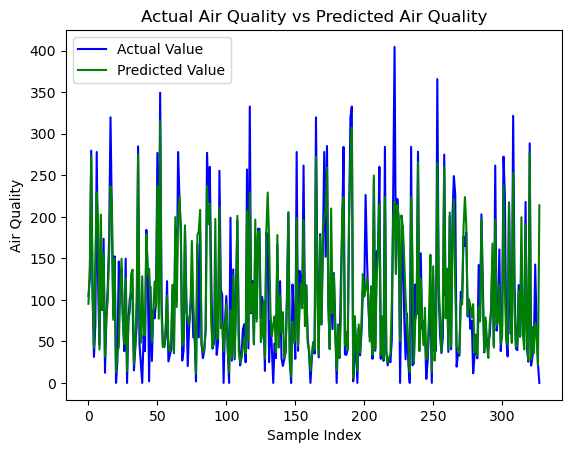

In [33]:
import matplotlib.pyplot as plt

# Plotting the actual values from the test set
plt.plot(Y_test.values, color='blue', label='Actual Value')

# Plotting the predicted values from the best Random Forest Regressor model
plt.plot(test_predictions_best, color='green', label='Predicted Value')

# Adding title and labels
plt.title('Actual Air Quality vs Predicted Air Quality')
plt.xlabel('Sample Index')
plt.ylabel('Air Quality')

# Adding legend
plt.legend()

# Display the plot
plt.show()


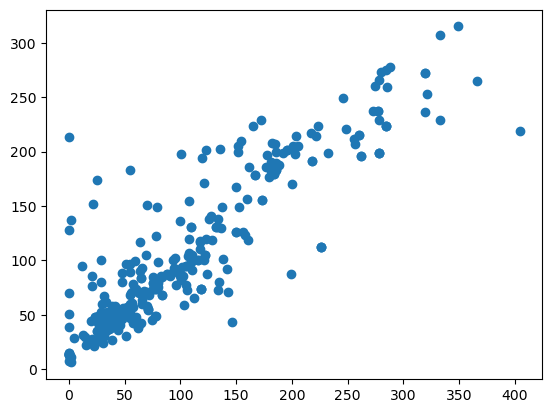

In [35]:
prediction = best_rf_model.predict(X_test)
plt.scatter(Y_test,prediction)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 24.04677999818847
MSE: 1534.5446780472128
RMSE: 39.17326483773356


#  Prediction

In [38]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

# Define the threshold for high pollution level (you can adjust this threshold based on your requirements)
threshold = 300  # For example, consider PM2.5 concentration above 300 as high pollution level

# Define and train the RandomForestRegressor model
rf_random = RandomForestRegressor()
rf_random.fit(X_train, Y_train)

# Function to make predictions
def predict_airquality(T, TM, Tm, SLP, H, VV, V, VM):
    # Create input features for prediction
    x = [[T, TM, Tm, SLP, H, VV, V, VM]]
    # Make predictions using the trained model
    return rf_random.predict(x)

# Example prediction
predictions = predict_airquality(9, 8, 9.8, 1017.6, 93.0, 0.5, 4.3, 9.4)
print('Airquality:', predictions[0])

# Check if any of the predictions exceed the threshold
is_high_pollution = predictions > threshold

# Print the indices of samples where pollution level is high
print("Indices of samples with high pollution level:")
print(np.where(is_high_pollution)[0])

# If any sample's pollution level is high, trigger water sprinklers
if any(is_high_pollution):
    print("Air pollution level is high. Triggering water sprinklers.")
    # Add code here to trigger water sprinklers
else:
    print("Air pollution level is not high. No intervention needed.")


Airquality: 190.10720833333326
Indices of samples with high pollution level:
[]
Air pollution level is not high. No intervention needed.
